# Classification of bank clients - churn forecasting

### Data Description

Features:
- RowNumber – row index in data
- CustomerId – unique customer identifier
- Surname – last name
- CreditScore – credit rating
- Geography – country of residence
- Gender – gender
- Age – age
- Tenure – amount of real estate owned by the customer
- Balance – account balance
- NumOfProducts – number of bank products used by the customer
- HasCrCard – availability of a credit card
- IsActiveMember – customer activity
- EstimatedSalary – estimated salary

Target (required) feature:
- Exited – fact of customer leaving

## Connecting libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [39]:
# Importing the dataset
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [40]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Exploratory Data Analysis (EDA)

In [41]:
# volume of data (rows and columns - objects and features)
df.shape

(10000, 14)

In [42]:
# data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Target feature - 'Exited'

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
# Columns names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# How many missing values are there in the 'CreditScore' column?
df['CreditScore'].isna().sum()

0

In [47]:
for col in df.columns:
    #print('Number of missing values in a column %s = %d' % (col, df[col].isna().sum()))
    print(f'Number of missing values in a column {col} = {df[col].isna().sum()}')

Number of missing values in a column RowNumber = 0
Number of missing values in a column CustomerId = 0
Number of missing values in a column Surname = 0
Number of missing values in a column CreditScore = 0
Number of missing values in a column Geography = 0
Number of missing values in a column Gender = 0
Number of missing values in a column Age = 0
Number of missing values in a column Tenure = 0
Number of missing values in a column Balance = 0
Number of missing values in a column NumOfProducts = 0
Number of missing values in a column HasCrCard = 0
Number of missing values in a column IsActiveMember = 0
Number of missing values in a column EstimatedSalary = 0
Number of missing values in a column Exited = 0


In [48]:
# Check for missing values ​​for all columns of a dataframe
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
# How many unique values ​​are there in the 'Geography' column?
df['Geography'].nunique()

3

In [50]:
# What are these values?
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [51]:
# What is the distribution statistics of these values? 
df['Geography'].value_counts(normalize=True)

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [52]:
# Investigation of the target feature 'Exited' - the fact of customer churn
print('number of unique values in target: ', df['Exited'].nunique())
print('list of unique values in target: ', df['Exited'].unique())
print('statistics of distribution of values in the target: \n', df['Exited'].value_counts(normalize=True))

number of unique values in target:  2
list of unique values in target:  [1 0]
statistics of distribution of values in the target: 
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [53]:
# descriptive statistics for the 'Age' feature
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [54]:
# descriptive statistics for all (numerical) features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Visual analysis

<Axes: xlabel='Exited'>

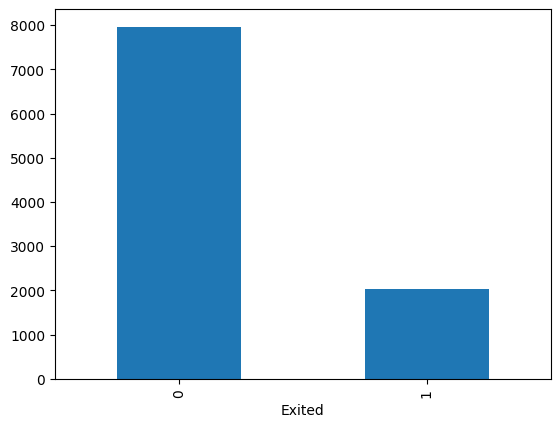

In [55]:
df['Exited'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

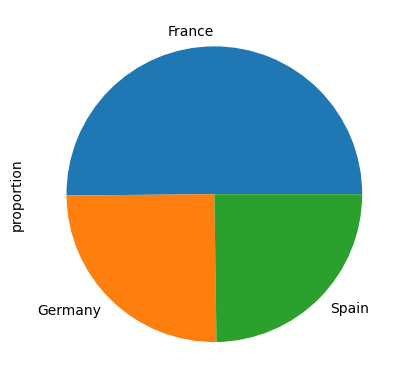

In [56]:
df['Geography'].value_counts(normalize=True).plot.pie()

In [57]:
df['Age'].nunique()

70

<Axes: ylabel='Age'>

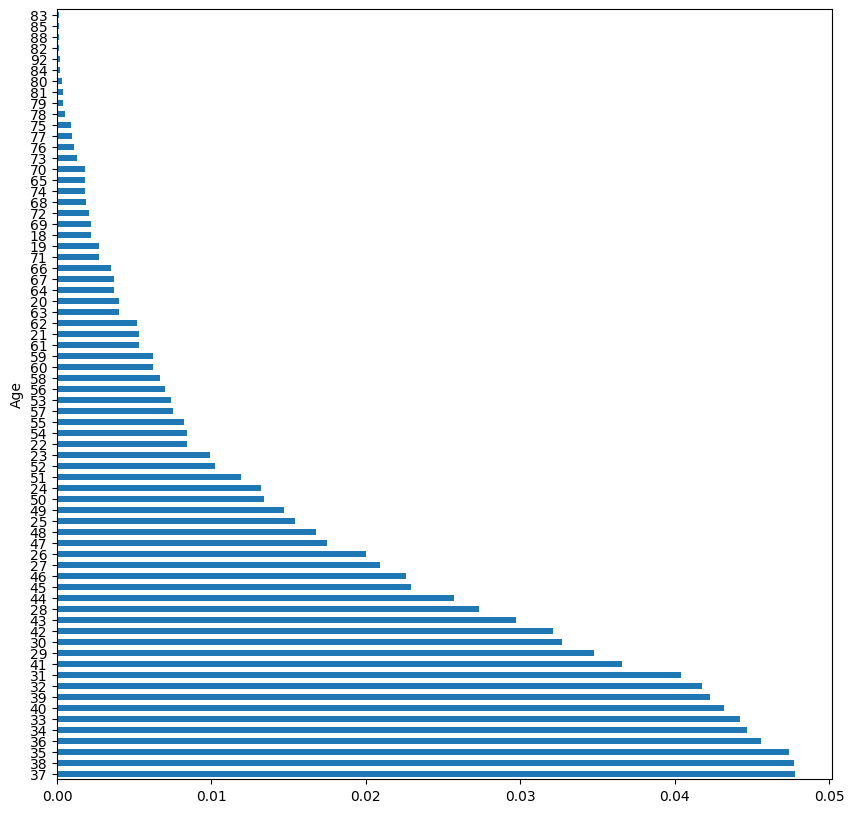

In [58]:
df['Age'].value_counts(normalize=True).plot.barh(figsize=(10,10))

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

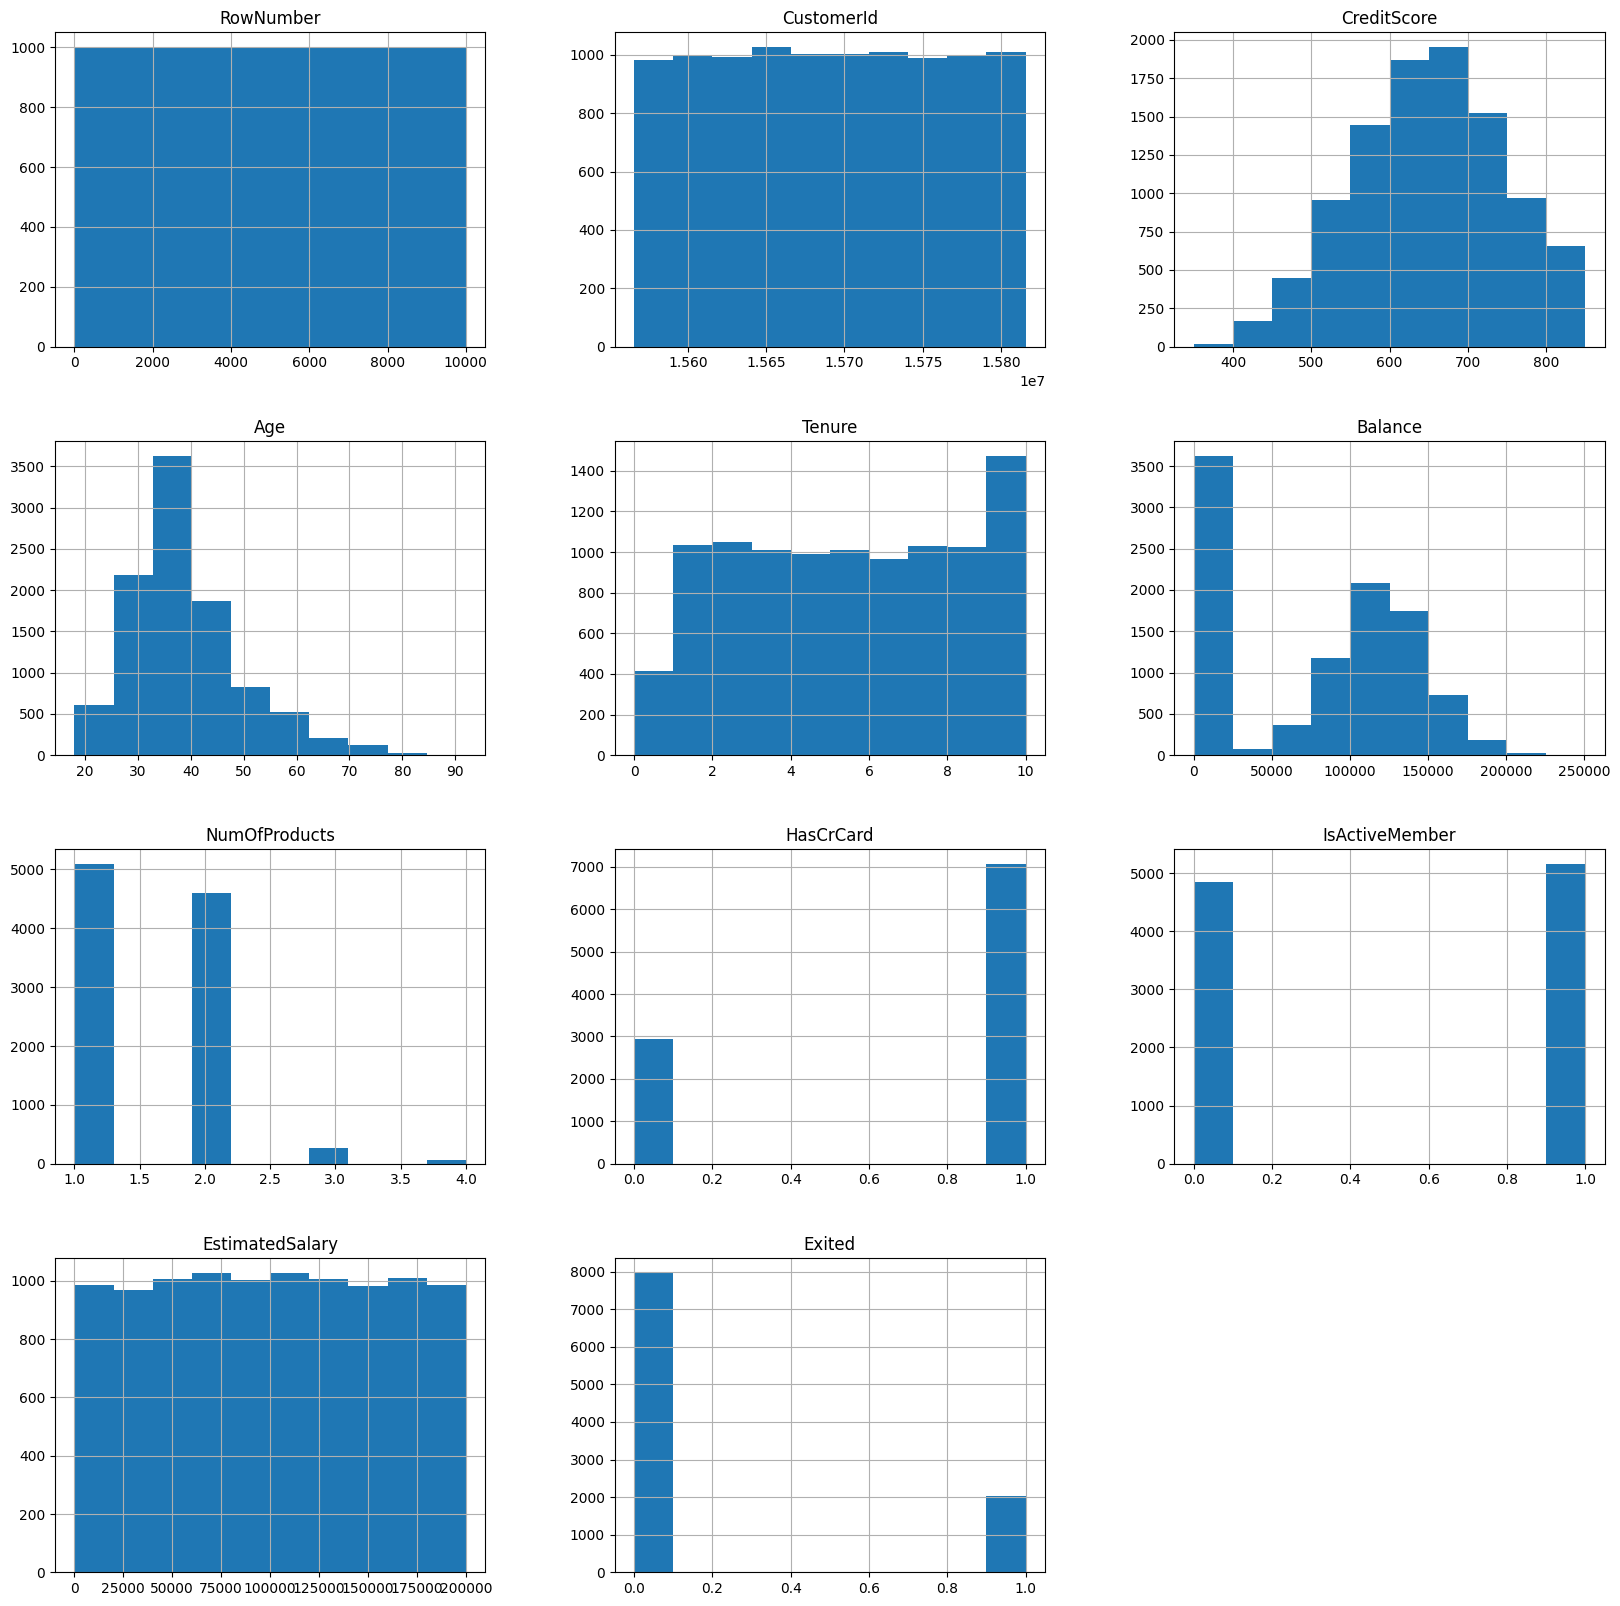

In [59]:
# histograms of all features
df.hist(figsize=(20,20))

<Axes: >

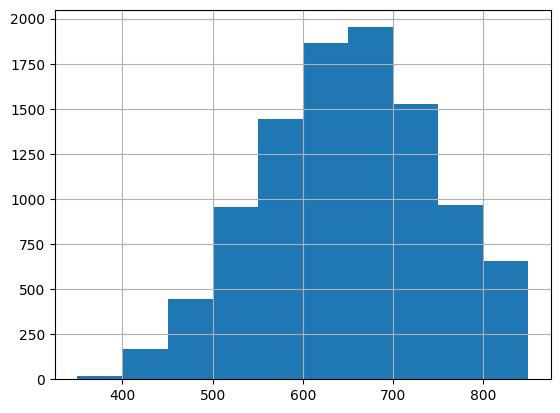

In [60]:
# histogram for 1 feature
df['CreditScore'].hist()

<Axes: >

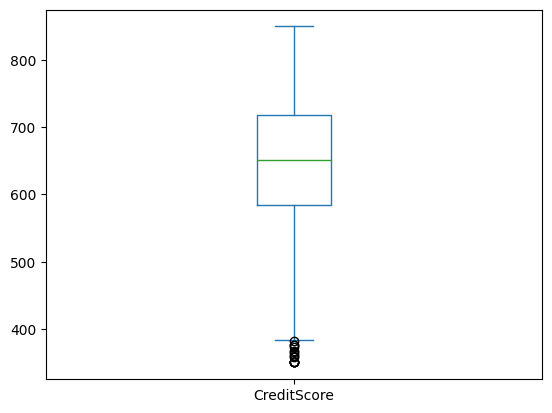

In [61]:
# "box plot" for visualizing the probability distribution of feature values
df['CreditScore'].plot.box()

<Axes: ylabel='Density'>

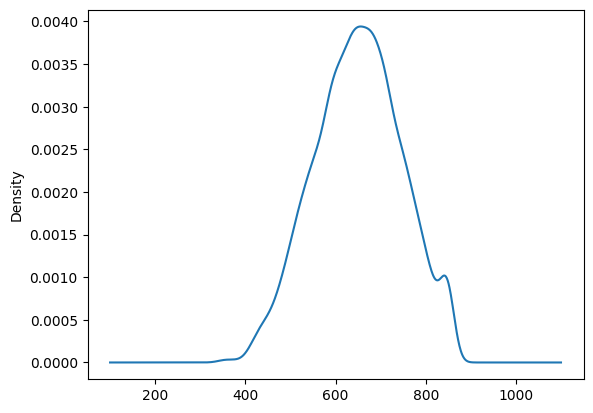

In [62]:
# feature density plot
df['CreditScore'].plot.density()

<Axes: ylabel='Age'>

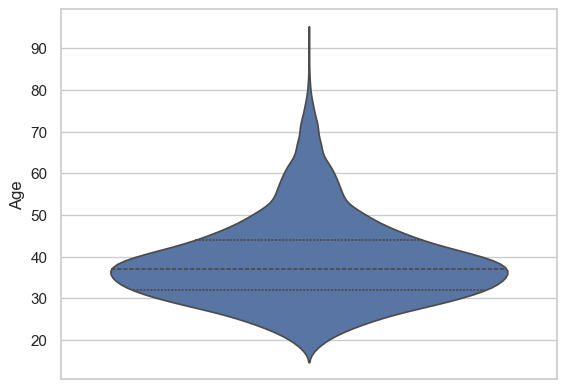

In [63]:
# apply theme with light grid lines
sns.set_theme(style="whitegrid")

# violin plot diagram
sns.violinplot(y=df["Age"], inner="quartile")

### Bivariate feature analysis

In [64]:
# list of features for analysis
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [65]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
# replacement of values ​​for the specified feature
df['Gender'] = df['Gender'].replace('Male', 0)
df['Gender'] = df['Gender'].replace('Female', 1)
df['Gender'] = df['Gender'].astype('int64')

In [ ]:
# creating a new column 'Geography_num' and replacing the character values ​​with integers
df['Geography_num'] = df['Geography']

df['Geography_num'] = df['Geography_num'].replace('France', 0)
df['Geography_num'] = df['Geography_num'].replace('Spain', 1)
df['Geography_num'] = df['Geography_num'].replace('Germany', 2)

In [68]:
# correlation matrix
corr = df[features_eda].corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008267
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,0.016936
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.048092
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.001418
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.348700
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.006180
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.004036
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.012692
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.007382
Exited,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.153771


<Axes: >

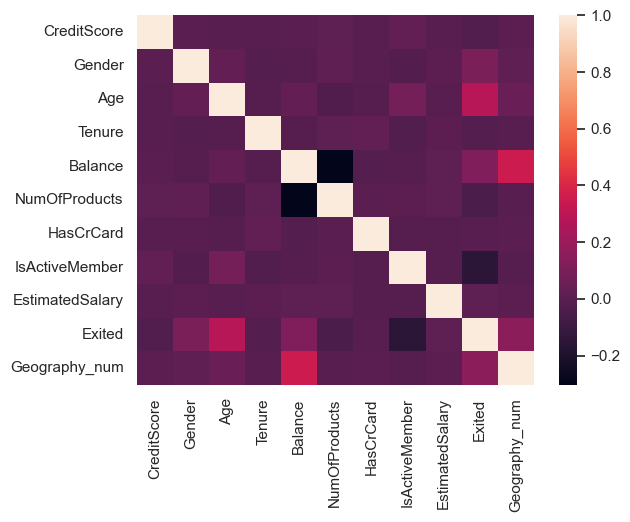

In [69]:
# heat map of correlations between features
sns.heatmap(corr)

Text(0, 0.5, 'Balance')

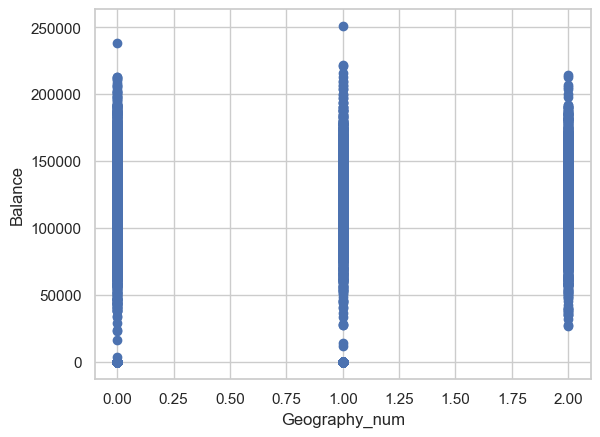

In [70]:
# scatterplot for 2 features
plt.scatter(df['Geography_num'], df['Balance'])
plt.xlabel('Geography_num')
plt.ylabel('Balance')

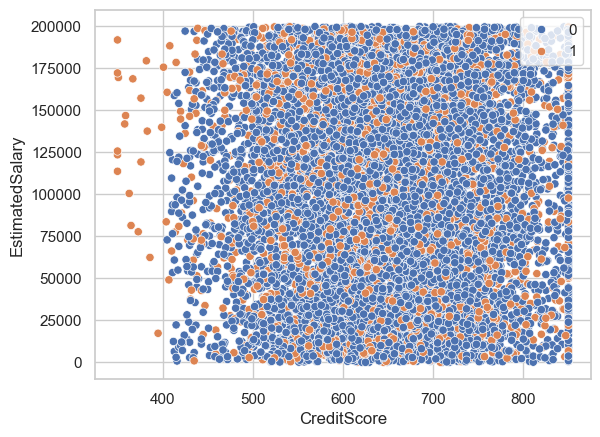

In [71]:
# scatterplot for 2 features using seaborn library 
# the colors of the dots depend on the class of the object (whether the client left or not)
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Exited") # , style="Exited"
plt.legend(loc='upper right')

Text(0, 0.5, 'Balance')

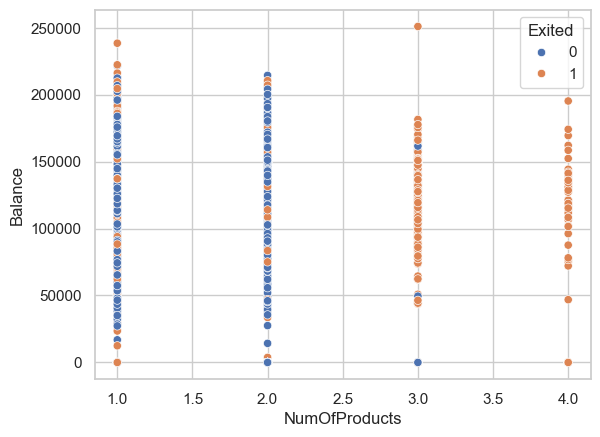

In [72]:
sns.scatterplot(data=df, x="NumOfProducts", y="Balance", hue="Exited") # Exited IsActiveMember HasCrCard 
plt.xlabel('NumOfProducts')
plt.ylabel('Balance')

Text(0, 0.5, 'Age')

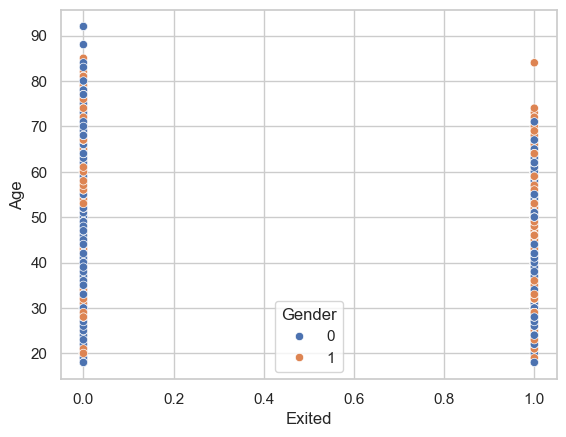

In [73]:
sns.scatterplot(data=df, x="Exited", y="Age", hue="Gender")
plt.xlabel('Exited')
plt.ylabel('Age')

<Axes: xlabel='Geography_num', ylabel='Balance'>

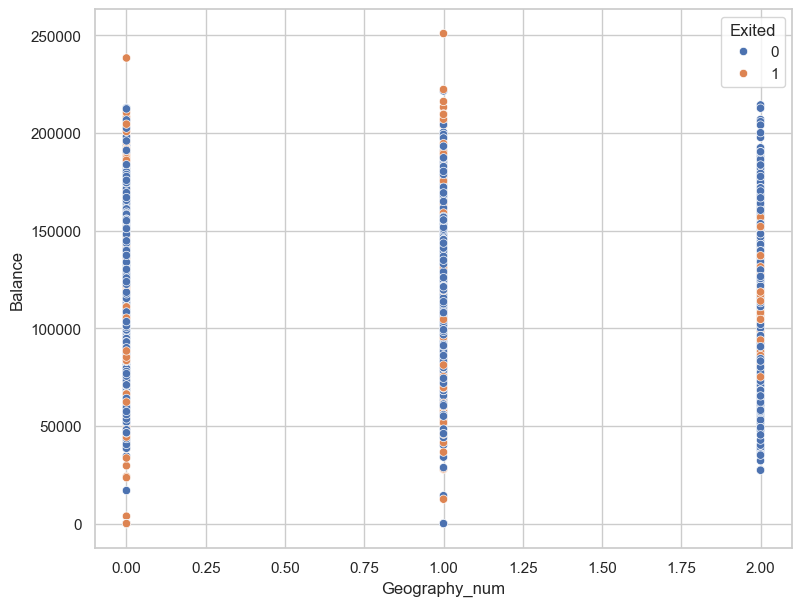

In [74]:
plt.figure(figsize=(9, 7))
sns.scatterplot(data=df, x="Geography_num", y="Balance", hue="Exited")

array([[<Axes: xlabel='CreditScore', ylabel='CreditScore'>,
        <Axes: xlabel='Gender', ylabel='CreditScore'>,
        <Axes: xlabel='Age', ylabel='CreditScore'>,
        <Axes: xlabel='Tenure', ylabel='CreditScore'>,
        <Axes: xlabel='Balance', ylabel='CreditScore'>,
        <Axes: xlabel='NumOfProducts', ylabel='CreditScore'>,
        <Axes: xlabel='HasCrCard', ylabel='CreditScore'>,
        <Axes: xlabel='IsActiveMember', ylabel='CreditScore'>,
        <Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>,
        <Axes: xlabel='Exited', ylabel='CreditScore'>,
        <Axes: xlabel='Geography_num', ylabel='CreditScore'>],
       [<Axes: xlabel='CreditScore', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Tenure', ylabel='Gender'>,
        <Axes: xlabel='Balance', ylabel='Gender'>,
        <Axes: xlabel='NumOfProducts', ylabel='Gender'>,
        <Axes: xlabel='HasCrCard', ylabel='Gend

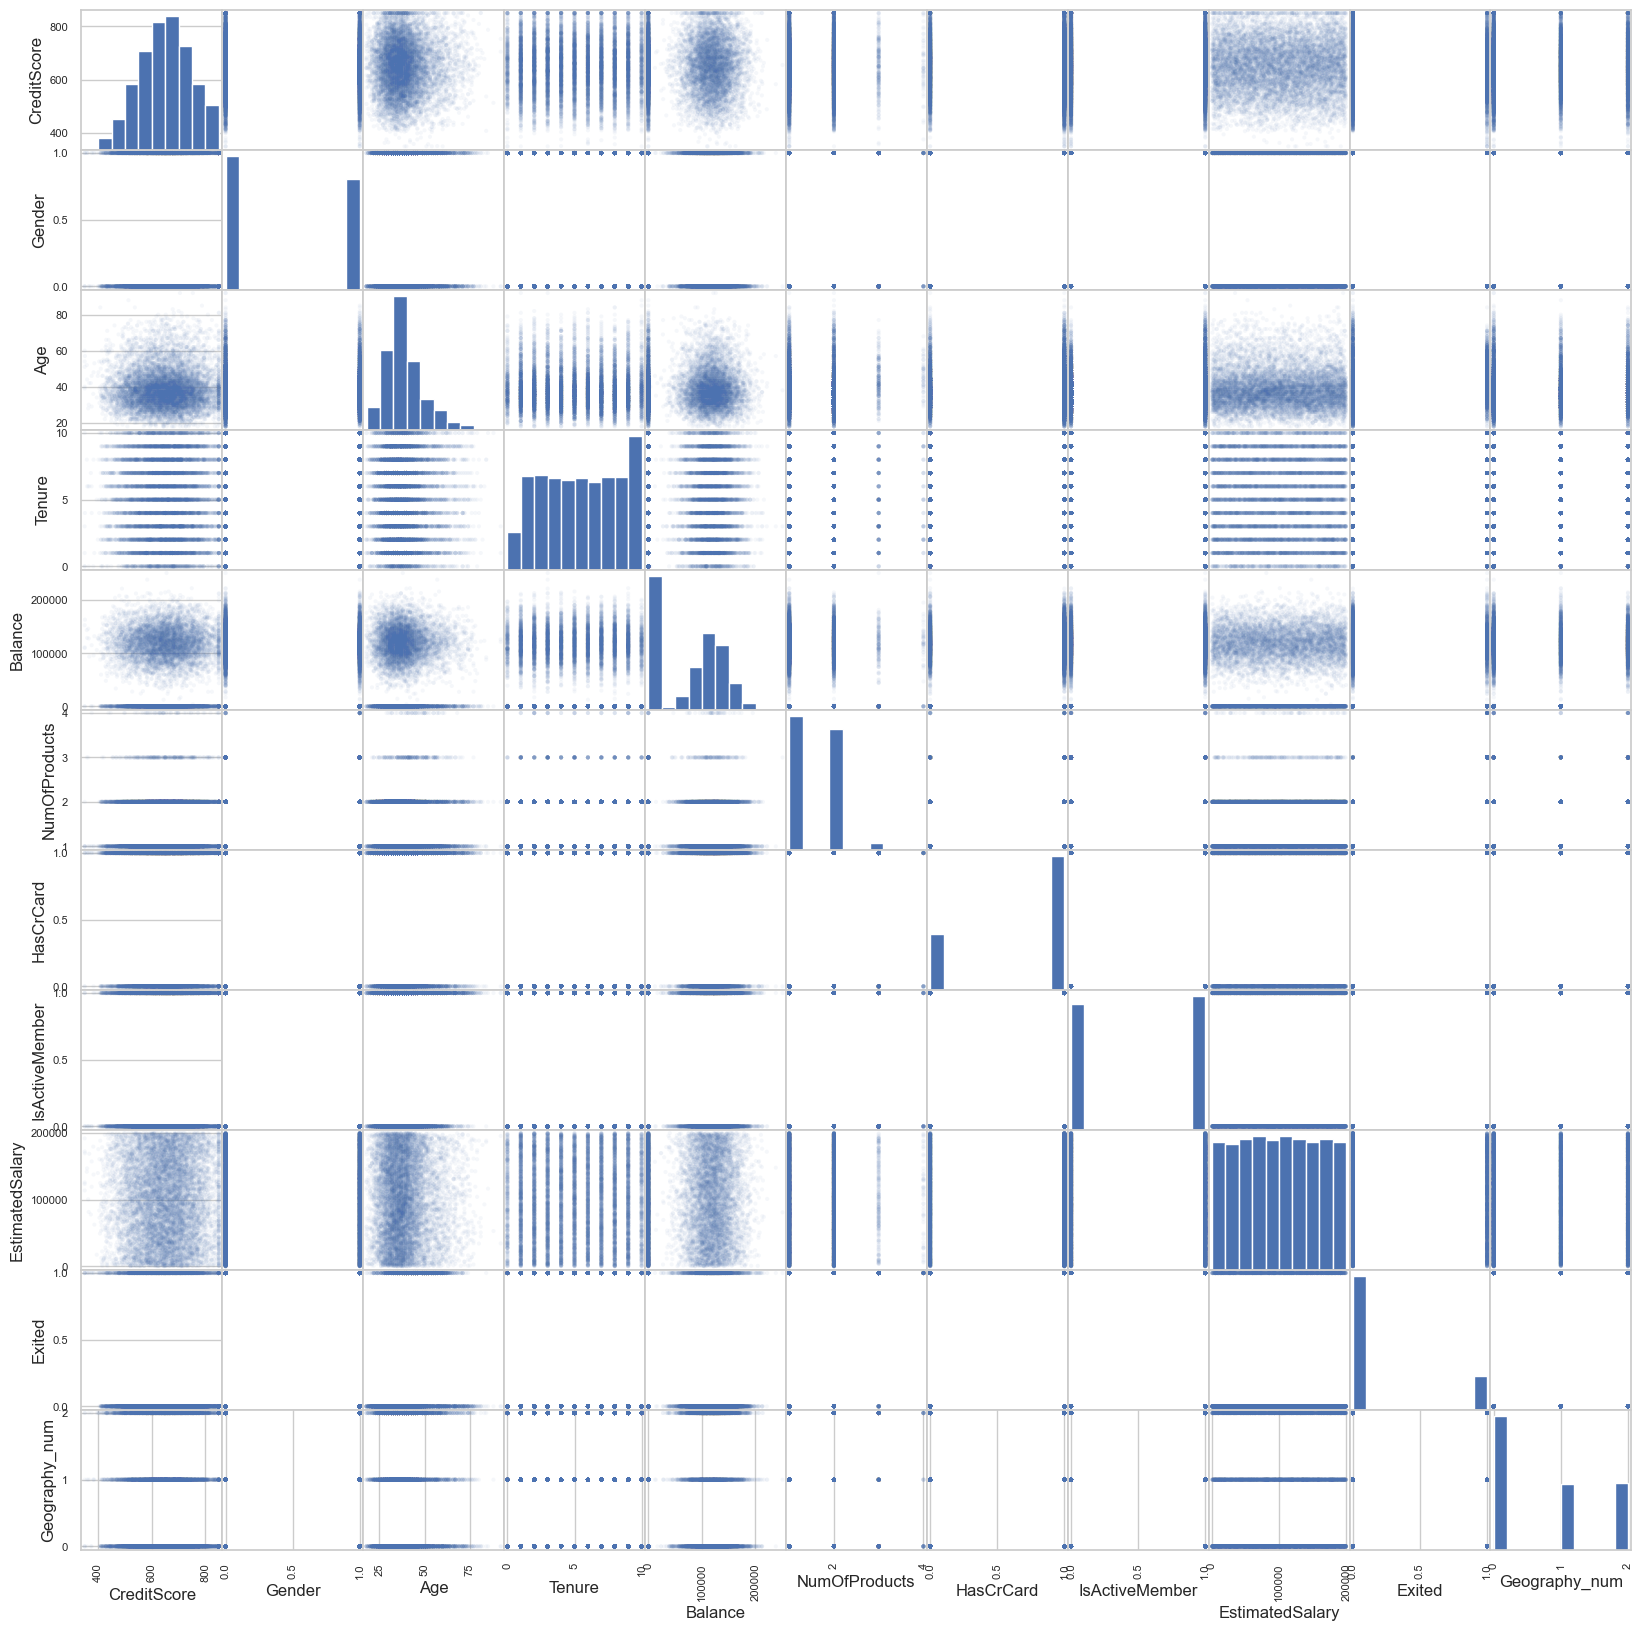

In [75]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[features_eda], alpha=0.05, figsize=(20, 20))

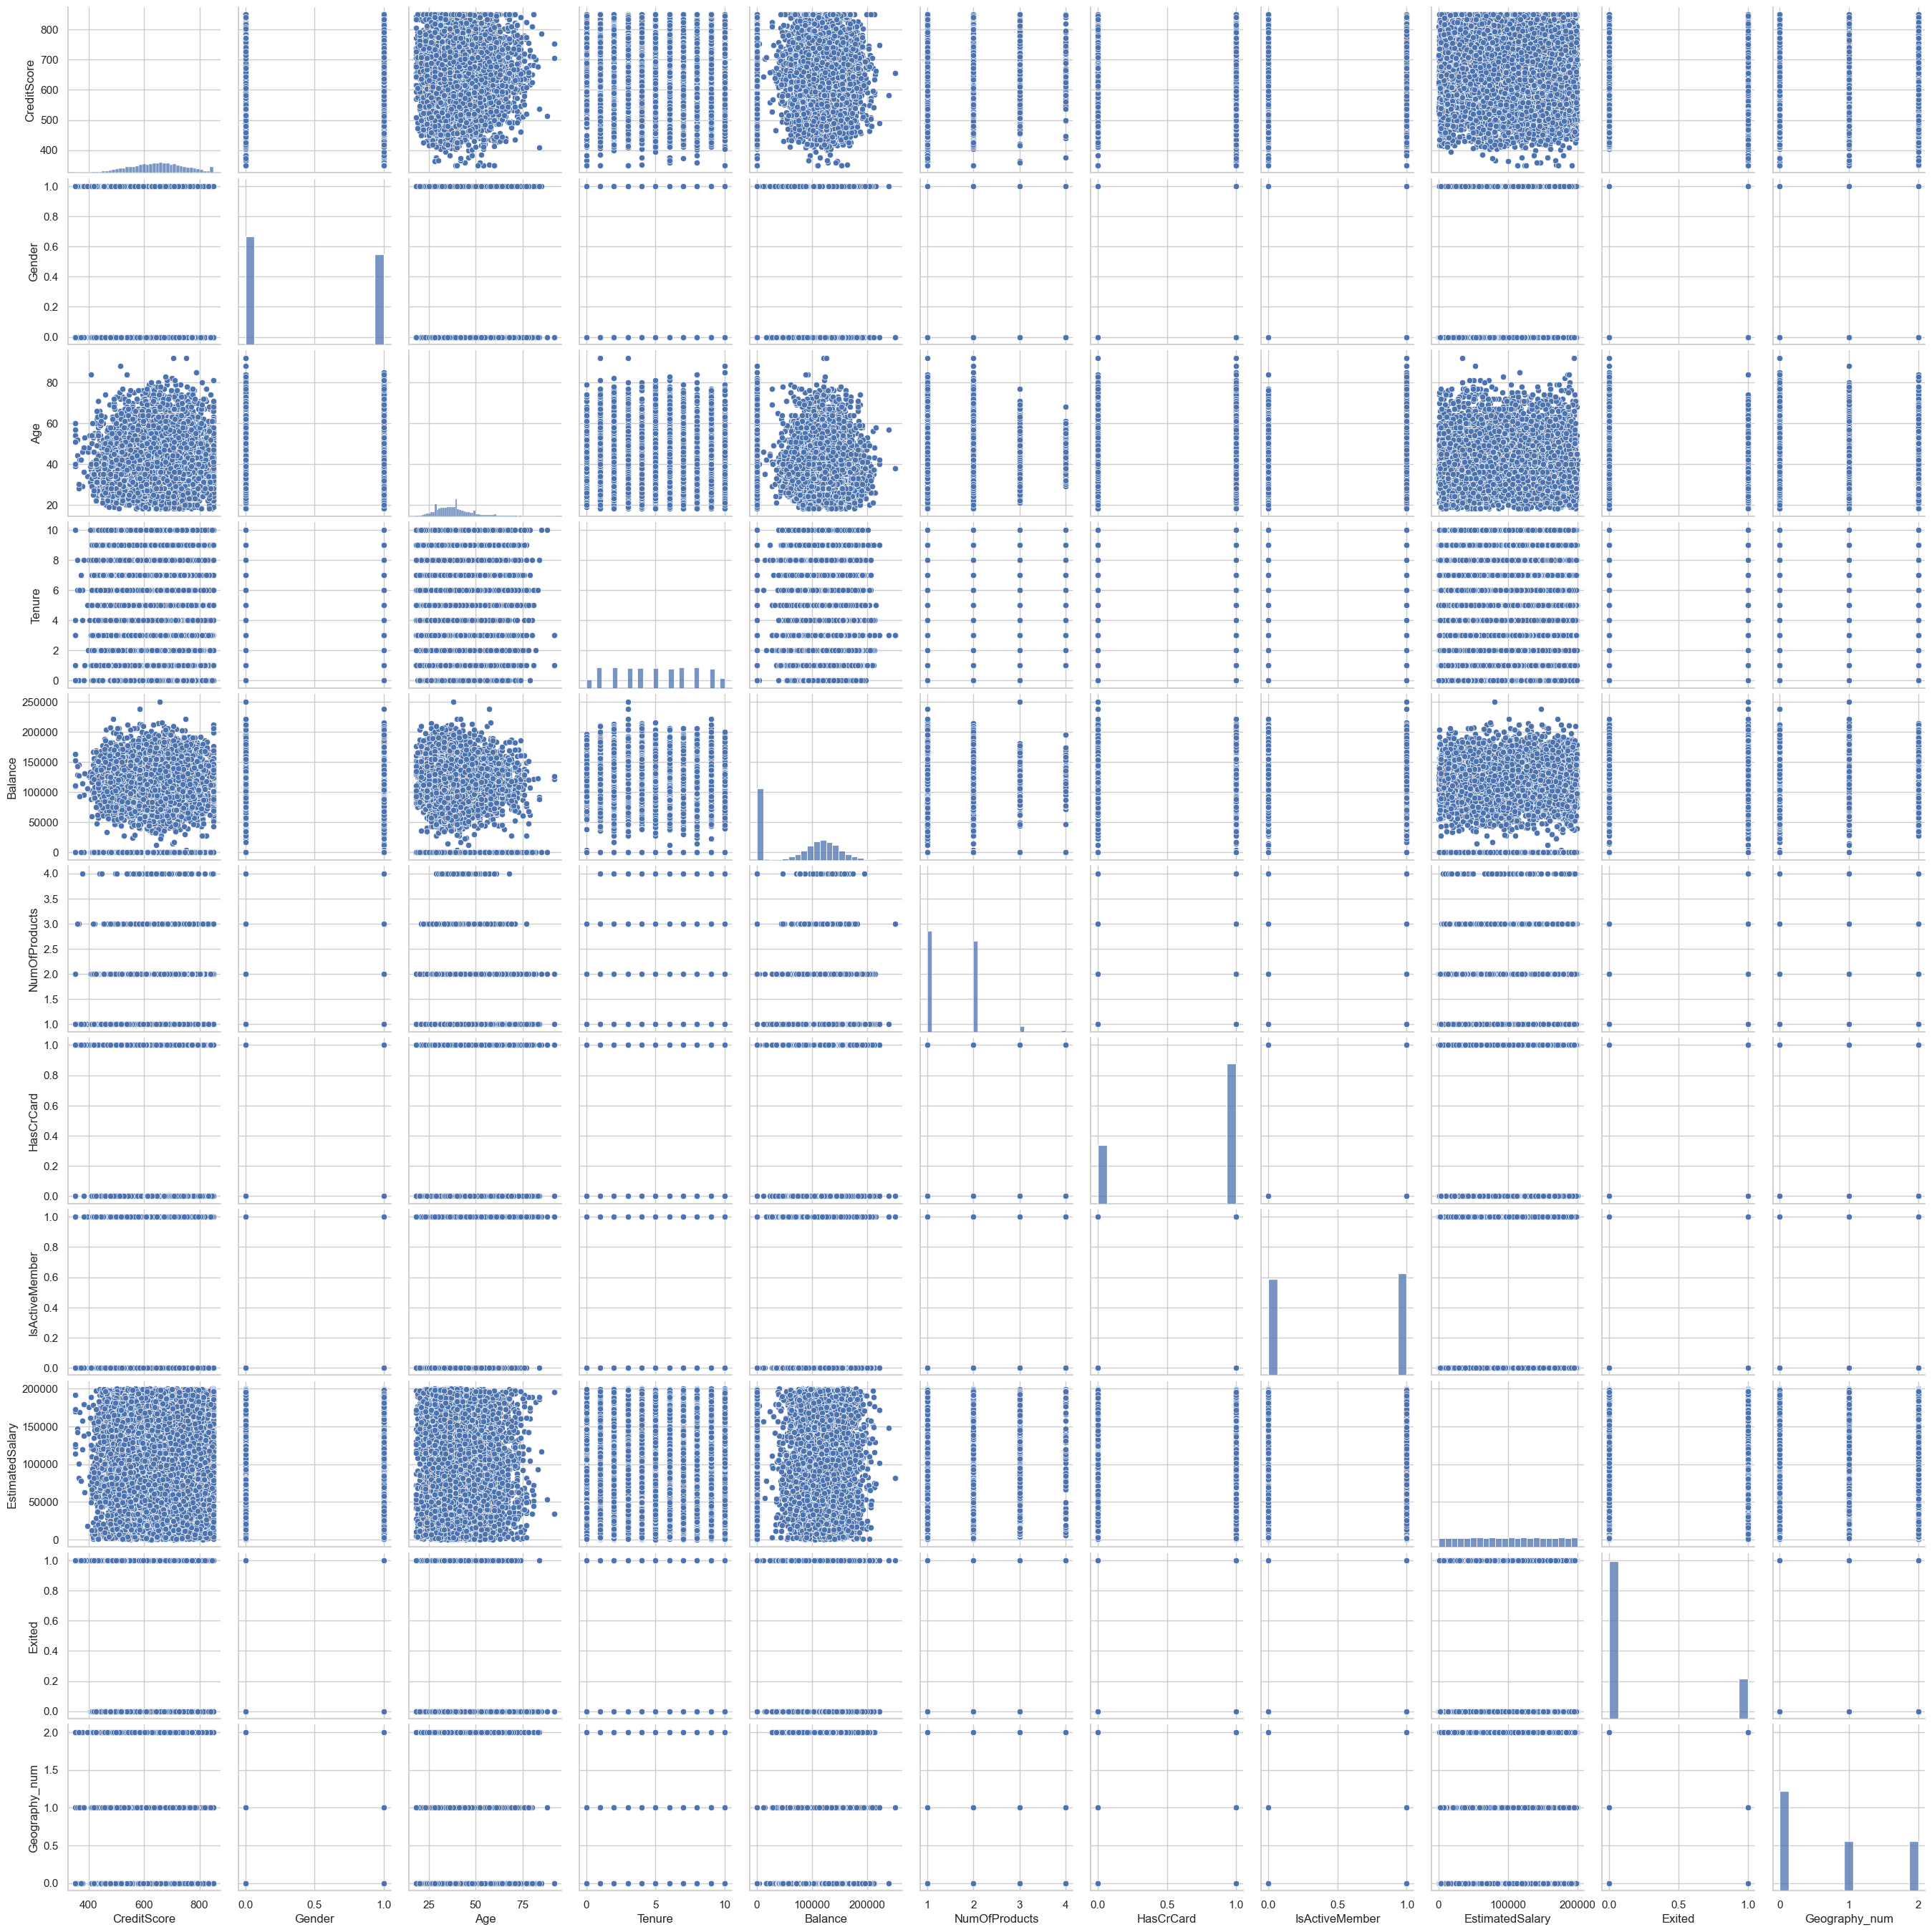

In [76]:
sns.pairplot(df[features_eda])

[Text(1, 0, 'EstimatedSalary'), Text(2, 0, 'Balance')]

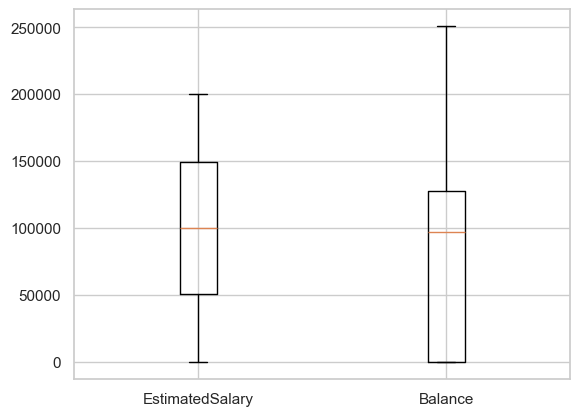

In [78]:
my_dict = {'EstimatedSalary': df['EstimatedSalary'], 'Balance': df['Balance']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

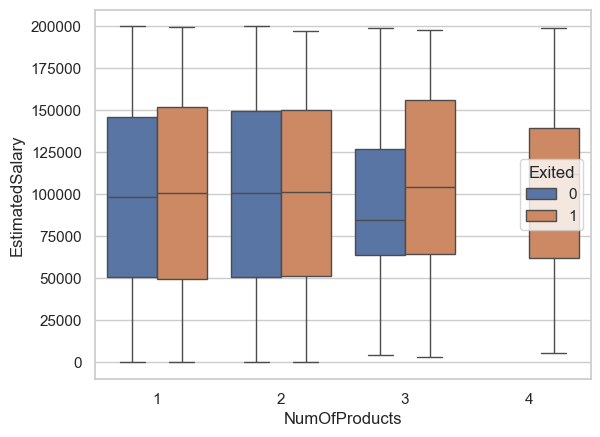

In [80]:
sns.boxplot(data=df, y="EstimatedSalary", x="NumOfProducts", hue="Exited")

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

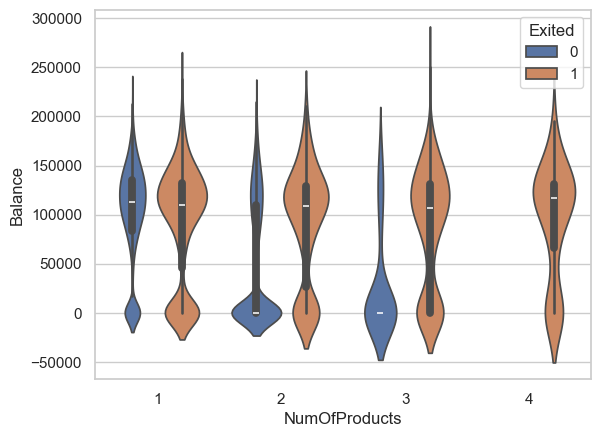

In [81]:
sns.violinplot(data=df, y="Balance", x="NumOfProducts", hue="Exited")

In [82]:
# average balance by number of products
df.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1    98551.870614
2    51879.145813
3    75458.328195
4    93733.135000
Name: Balance, dtype: float64

<Axes: xlabel='NumOfProducts'>

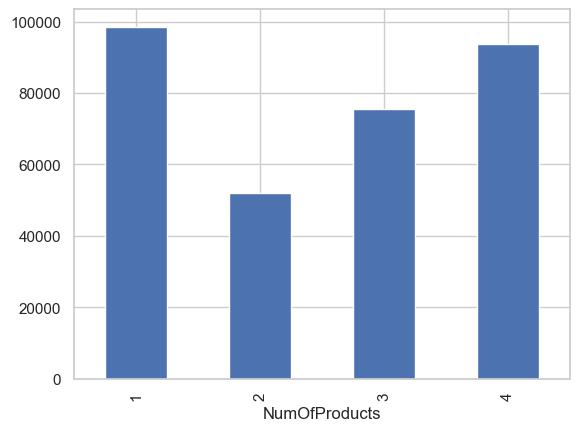

In [83]:
df.groupby('NumOfProducts')['Balance'].mean().plot.bar()

### Multivariate feature analysis

In [84]:
# summary table - average balance by country and number of products
result = pd.pivot_table(data=df, index='Geography', columns='NumOfProducts', values='Balance')
result

NumOfProducts,1,2,3,4
Geography,,,,
France,90977.877896,31828.097047,50071.822500,71362.731379
Germany,119868.328139,119341.245038,121572.672396,121442.305417
Spain,90595.373063,32690.852688,48385.897121,91407.651429


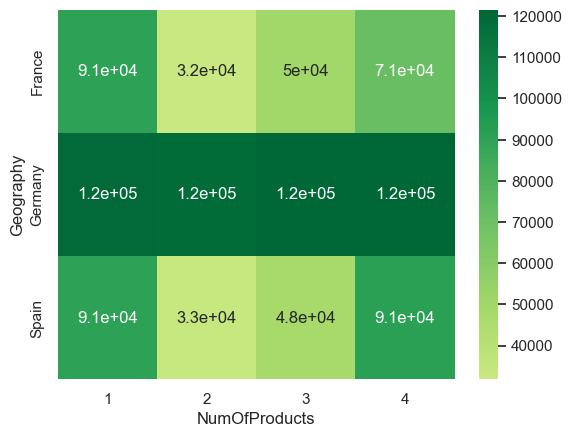

In [85]:
# heat map of balance by country and number of products
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Data preprocessing

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [87]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


### Identifying outliers

In [88]:
numeric_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

In [89]:
df[numeric_columns].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881,38.921800
std,96.653299,62397.405202,57510.492818,10.487806
min,350.000000,0.000000,11.580000,18.000000
25%,584.000000,0.000000,51002.110000,32.000000
50%,652.000000,97198.540000,100193.915000,37.000000
75%,718.000000,127644.240000,149388.247500,44.000000
max,850.000000,250898.090000,199992.480000,92.000000


### Transformation of non-binary categorical features into a set of dummy binary ones

In [92]:
# generating binary columns (dummy variables) for the categorical feature Geography
geography_cols = pd.get_dummies(df["Geography"]).astype('int64')
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Formation of a dataset for training models

In [90]:
# list of feature names that will be used to build the model
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [93]:
# combining the original features and fictitious binary features - forming a matrix of Feature Objects
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [94]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [95]:
# separating the target variable into a separate vector
y = df['Exited']

## Initial training of the model and assessment of the forecast quality

In [96]:
# splitting data into training and test samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [97]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


In [ ]:
# data normalization
# from sklearn.preprocessing import StandardScaler

In [98]:
%%time
# training a K-nearest neighbor classification model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 203 ms
Wall time: 926 ms


KNeighborsClassifier()

In [99]:
%%time
# predicting the client class (left or stayed) on training and test samples
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print(y_train_predict.shape, type(y_train_predict), y_train_predict[:20])
print(y_test_predict.shape, type(y_test_predict), y_test_predict[:20])


(8000,) <class 'numpy.ndarray'> [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(2000,) <class 'numpy.ndarray'> [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]
CPU times: total: 531 ms
Wall time: 564 ms


In [100]:
# calculating the prediction error as the proportion of incorrectly classified customers
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.182625 0.239


In [121]:
#from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, r2_score, plot_roc_curve
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, ConfusionMatrixDisplay, RocCurveDisplay 
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

test accuracy:  0.858


In [108]:
%%time
from sklearn.model_selection import GridSearchCV

n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

CPU times: total: 3.31 s
Wall time: 3.35 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 15]})

In [109]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.20875 10


In [110]:
%%time
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.799375
test accuracy:  0.795
CPU times: total: 594 ms
Wall time: 594 ms


In [111]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=22)
rfc.fit(X_train, y_train)

y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  0.858


In [112]:
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))
print('test r2_score: ', r2_score(y_test, y_test_predict))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test precision_score:  0.7718446601941747
test recall_score:  0.4015151515151515
test f1_score:  0.5282392026578073
test r2_score:  0.105770926219804
test mean_squared_error:  0.142
test mean_absolute_error:  0.142


In [113]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[1557,   47],
       [ 237,  159]], dtype=int64)

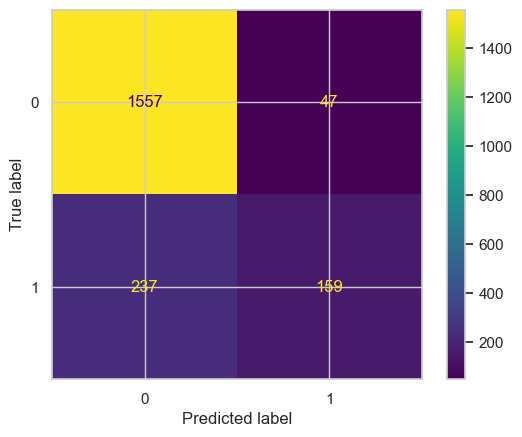

In [123]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

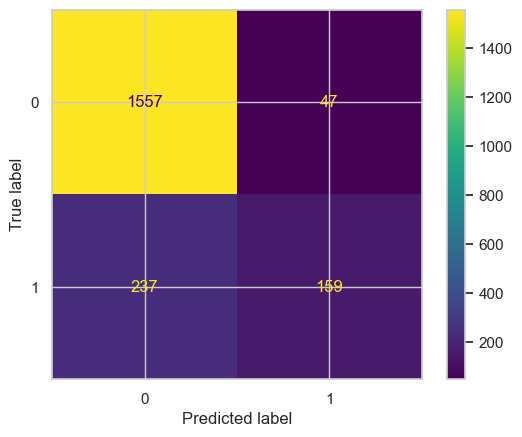

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)
plt.show()

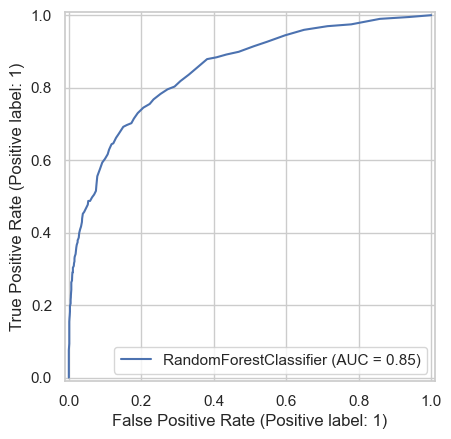

In [125]:
RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

In [126]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, X.columns[idx], importances[idx]))

Feature importances:
 1. feature 'Age  ' (0.2439)
 2. feature 'EstimatedSalary' (0.1438)
 3. feature 'Balance' (0.1426)
 4. feature 'CreditScore' (0.1418)
 5. feature 'NumOfProducts' (0.1254)
 6. feature 'Tenure' (0.0815)
 7. feature 'IsActiveMember' (0.0435)
 8. feature 'Germany' (0.0212)
 9. feature 'HasCrCard' (0.0191)
10. feature 'Gender' (0.0188)
11. feature 'France' (0.0095)
12. feature 'Spain' (0.0089)
